<a href="https://colab.research.google.com/github/sarumathi03/Text-Classification-ML-Project/blob/main/Sample_Project_Text_Classification_Financial_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries
import numpy as np 
import pandas as pd
import os


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from string import punctuation
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from wordcloud import WordCloud
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,SGDClassifier, LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout
from keras.models import Sequential
from keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DATASETS/all-data.csv', encoding='latin-1', names=['sentiment', 'text'])
data.head()

,sentiment,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [ ]:
# making list stopwords for removing stopwords from our text 
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop = set(stopwords.words('english'))
stop.update(punctuation)
print(stop)

{'he', 'because', 'not', 'same', 'myself', 'my', 'have', 'but', 'or', 'that', 'were', "you're", '?', 'we', 'd', '(', '`', 'don', 'until', 'mustn', 'more', 'haven', '_', 'through', 'to', 'further', "it's", 'no', "needn't", '#', 'am', 'very', 're', 'i', "don't", '[', 'an', 'o', 'too', 'herself', 'can', 'should', 'into', 'wasn', 'the', 'are', "aren't", 'below', 'your', 'which', 'she', ']', 'down', "you'll", '@', '~', 'when', 'yourself', "didn't", "should've", 'is', 'yours', '!', 'once', 'with', 'his', 'wouldn', "you'd", 'her', 'ma', 'off', "mightn't", 'and', 'such', 'our', 'above', 'for', '{', 'nor', 'didn', '|', 'themselves', 'him', '.', 'some', 'in', "shan't", 'out', 'own', "won't", 'me', "'", 'did', 'during', '}', 'here', ';', 'few', 'their', 'both', 'other', "she's", '/', 'there', 'won', "you've", '>', 'shouldn', 'will', 'just', 'now', 'between', 'aren', 'about', 'then', 's', 'you', 'needn', 'against', 'any', 'ours', 'as', '*', "weren't", '<', 'doesn', '\\', 'couldn', 'its', 'this', '

In [ ]:
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
#Function to clean our text.
lemmatizer = WordNetLemmatizer()
def clean_review(text):
    clean_text = []
    for w in word_tokenize(text):
        if w.lower() not in stop:
            pos = pos_tag([w])
            new_w = lemmatizer.lemmatize(w, pos=get_simple_pos(pos[0][1]))
            clean_text.append(new_w)
    return clean_text

def join_text(text):
    return " ".join(text)

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# splitting data.
x_train,x_test,y_train,y_test = train_test_split(data.text,data.sentiment,test_size = 0.2 , random_state = 0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3876,), (3876,), (970,), (970,))

In [ ]:
pos = x_train[y_train[y_train=='positive'].index]
neg = x_train[y_train[y_train=='negative'].index]
neutral = x_train[y_train[y_train=='negative'].index]

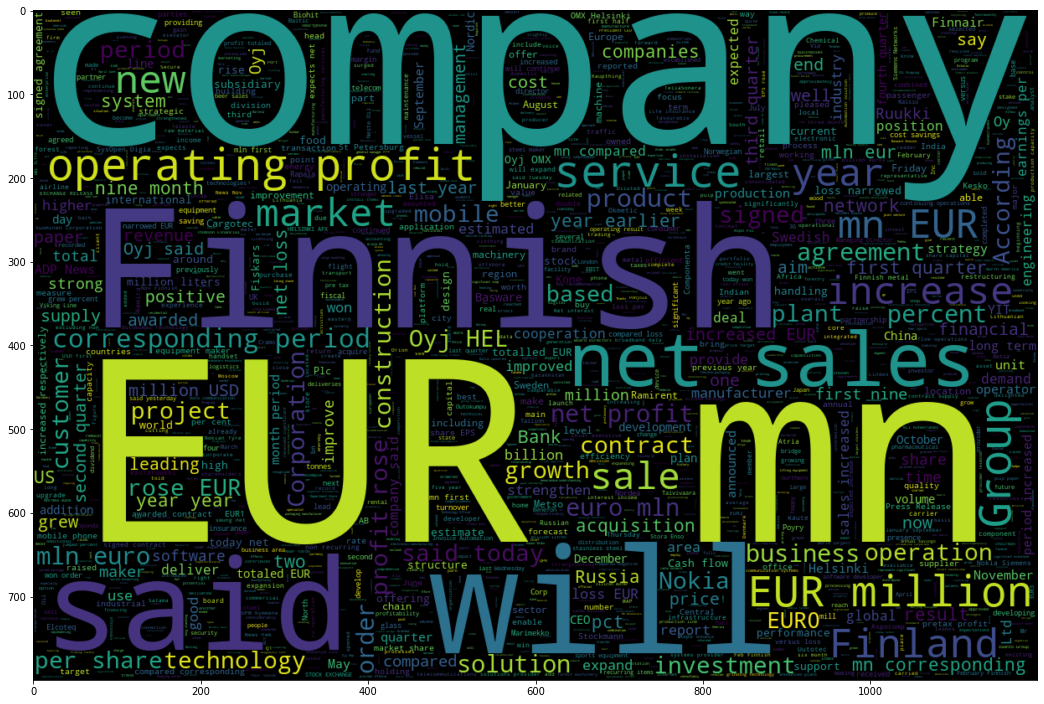

In [ ]:
plt.figure(figsize = (18,24)) # Text Reviews with positive Ratings
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(pos))
plt.imshow(wordcloud,interpolation = 'bilinear')

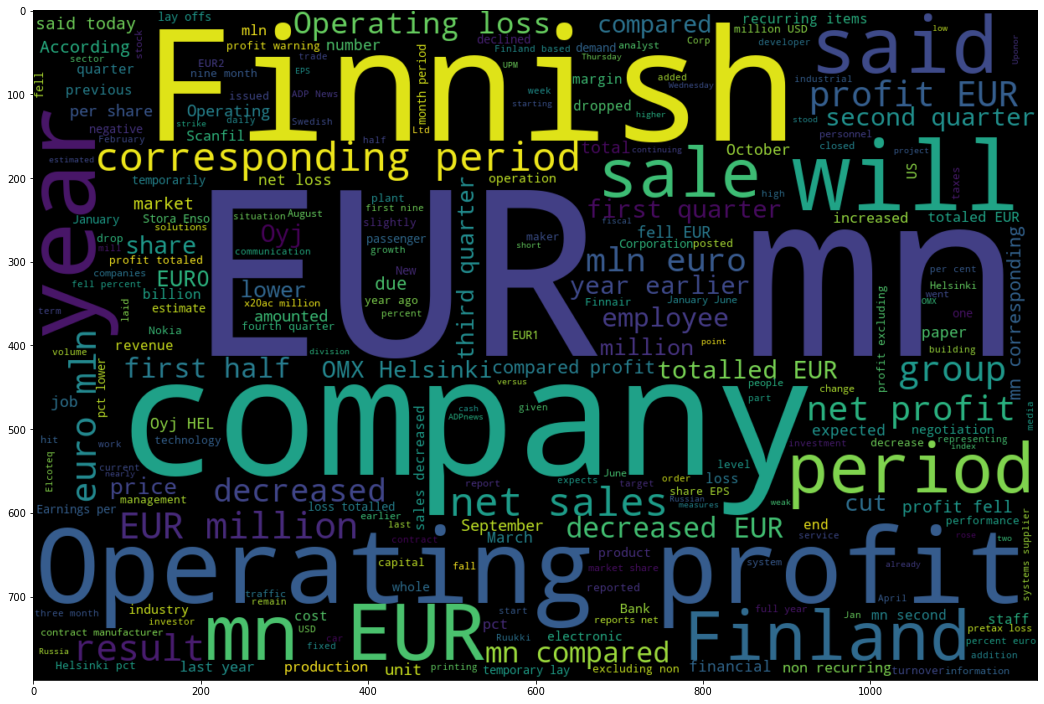

In [ ]:
plt.figure(figsize = (18,24)) # Text Reviews with negative Ratings
wordcloud = WordCloud(min_font_size = 3,  max_words = 250 , width = 1200 , height = 800).generate(" ".join(neg))
plt.imshow(wordcloud,interpolation = 'bilinear')

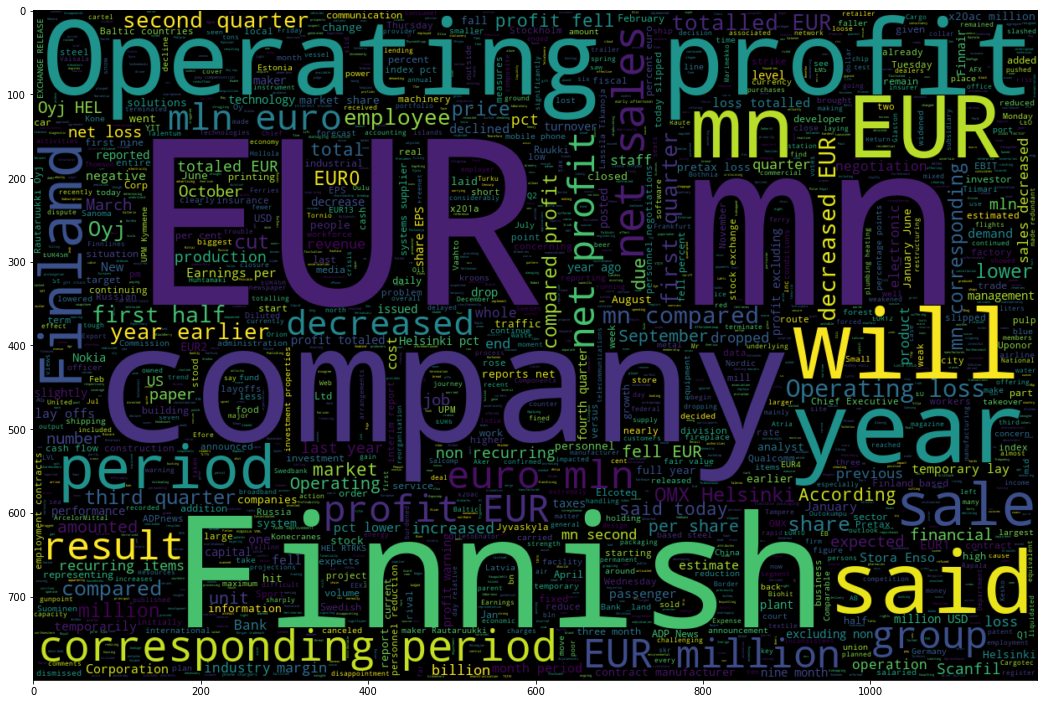

In [ ]:
plt.figure(figsize = (18,24)) # Text Reviews with neutral Ratings
wordcloud = WordCloud(min_font_size = 3,  max_words = 2500 , width = 1200 , height = 800).generate(" ".join(neutral))
plt.imshow(wordcloud,interpolation = 'bilinear')

In [ ]:
# creating a variable for count vectorizer which gives us features using the whole text of data.
count_vec = CountVectorizer(max_features=4000, ngram_range=(1,2), max_df=0.9, min_df=0)
x_train_features = count_vec.fit_transform(x_train).todense()
x_test_features = count_vec.transform(x_test).todense()
x_train_features.shape, x_test_features.shape

((3876, 4000), (970, 4000))

Multinomial NaiveBayes

In [ ]:
nb_clf = MultinomialNB()
nb_clf.fit(x_train_features, y_train)
y_pred = nb_clf.predict(x_test_features)
print(accuracy_score(y_test,y_pred)*100)

72.78350515463917


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.54      0.55      0.54       128
     neutral       0.77      0.89      0.82       575
    positive       0.72      0.47      0.57       267

    accuracy                           0.73       970
   macro avg       0.67      0.64      0.64       970
weighted avg       0.72      0.73      0.72       970



Neural Network with Keras

In [ ]:
y_train[y_train=='positive']=2
y_train[y_train=='neutral']=1
y_train[y_train=='negative']=0
y_test[y_test=='positive']=2
y_test[y_test=='neutral']=1
y_test[y_test=='negative']=0

encoder = OneHotEncoder()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape, y_test.shape

((3876, 3), (970, 3))

In [ ]:
# Function to fit our model and plot accuracy curves for train and test data.
def fit_model(optimizer):
    model = Sequential()
    
    model.add(Dense(units=512, activation='relu', input_dim=x_train_features.shape[1]))
    model.add(Dropout(0.2))
    model.add(Dense(units=256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    history = model.fit(x_train_features, y_train, validation_data=(x_test_features, y_test), epochs=100, verbose=0)
    
    print('Accuracy with',optimizer,'optimizer is :',model.evaluate(x_test_features, y_test)[1]*100)
    
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.legend()
    plt.title('opt='+optimizer)

31/31 [==============================] - 0s 6ms/step - loss: 0.8445 - accuracy: 0.7794
Accuracy with sgd optimizer is : 77.93814539909363
31/31 [==============================] - 0s 6ms/step - loss: 3.8388 - accuracy: 0.7691
Accuracy with rmsprop optimizer is : 76.907217502594
31/31 [==============================] - 0s 6ms/step - loss: 0.6043 - accuracy: 0.7608
Accuracy with adagrad optimizer is : 76.08247399330139
31/31 [==============================] - 0s 6ms/step - loss: 2.2729 - accuracy: 0.7588
Accuracy with adam optimizer is : 75.87628960609436


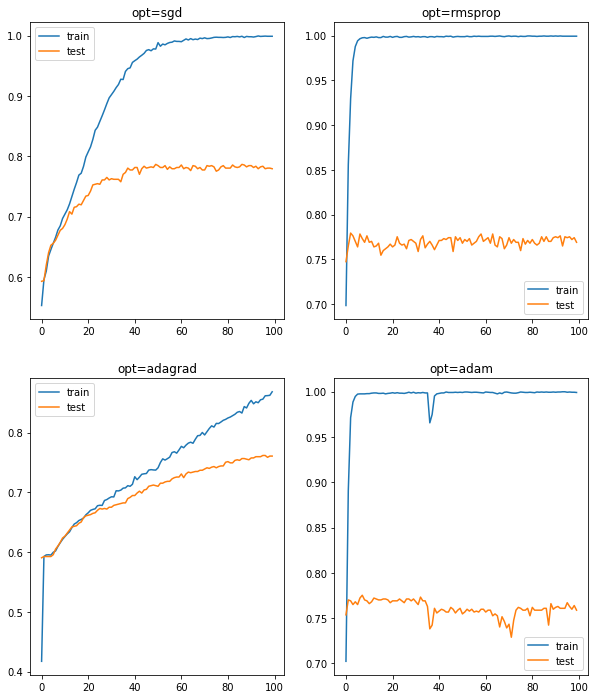

In [ ]:
optimizers = ['sgd', 'rmsprop', 'adagrad', 'adam']
plt.figure(figsize=(10,12))
for i in range(len(optimizers)):
    # determine the plot number
    plot_no = 220 + (i+1)
    plt.subplot(plot_no)
    # fit model and plot learning curves for an optimizer
    fit_model(optimizers[i])
# show learning curves
plt.show()